# Analisando os Dados do Titanic

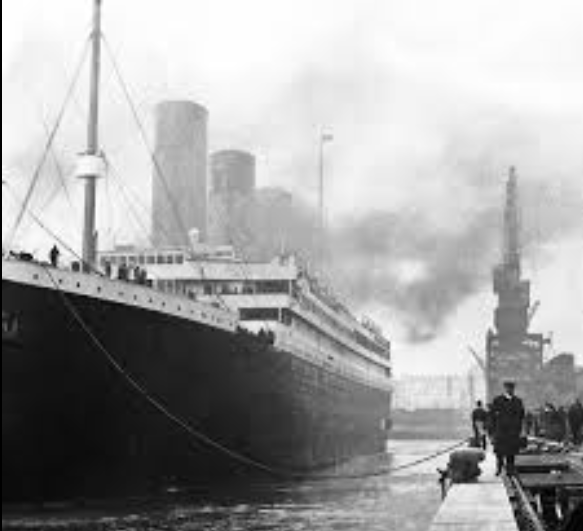

# História do RMS Titanic

O **RMS Titanic** foi um dos navios mais famosos e trágicos da história marítima. Aqui está uma breve descrição de sua história:

O *Titanic* foi um navio de passageiros britânico construído pela *White Star Line*. Ele era considerado o navio mais luxuoso e tecnologicamente avançado de sua época, ostentando comodidades inovadoras e um design impressionante. A construção do *Titanic* começou em março de 1909, e o navio foi lançado ao mar em maio de 1911. Ele partiu em sua viagem inaugural de Southampton, Inglaterra, para Nova York, EUA, em 10 de abril de 1912.

No entanto, em 14 de abril de 1912, durante a noite, o *Titanic* colidiu com um iceberg no Atlântico Norte. A colisão abriu uma série de compartimentos estanques no casco do navio, resultando em sua inevitável tragédia. Devido à falta de botes salva-vidas suficientes e ao rápido afundamento, mais de 1.500 pessoas a bordo perderam a vida naquele que é um dos piores desastres marítimos da história.

A tragédia do *Titanic* provocou um clamor global e levou a mudanças significativas nas regulamentações marítimas, incluindo a exigência de botes salva-vidas suficientes para todos a bordo e a criação da Comissão Mersey para investigar o desastre. O evento também teve um impacto duradouro na cultura popular, inspirando inúmeros livros, filmes, músicas e peças teatrais ao longo dos anos.

Em termos de legado, o naufrágio do *Titanic* foi redescoberto no fundo do oceano Atlântico em 1985 e tem sido objeto de várias expedições de pesquisa. O naufrágio e sua história continuam a fascinar as pessoas até hoje, destacando a complexidade das escolhas humanas e as consequências de eventos trágicos.


In [1]:
#imports das bibilotecas
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from scipy.stats import zscore
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import scikitplot as skplt
import warnings

def mostra_hora():
    agora = datetime.now()
    print(str(agora.hour)+':'+str(agora.minute)+':'+str(agora.second))
    
warnings.filterwarnings('ignore')

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_25544/1119599538.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Carregando os Dados

In [2]:
arquivo1 = '../data/default/train.csv'
arquivo2 = '../data/default/test.csv'
treino = pd.read_csv(arquivo1, sep=',')
teste = pd.read_csv(arquivo2, sep=',')

## Entendendo os Dados de Treino

In [3]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
mostra_hora()
plt.rcParams['font.sans-serif'] = 'Arial'
# Criação do ProfileReport
profile = ProfileReport(treino, title="titanic_treino")
# Salvando o Report em HTML
profile.to_file("../out/reports/titanic_treino.html")
mostra_hora()

11:25:11


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

11:25:21


In [5]:
amostra = treino.shape

In [6]:
# Tamnho do Dataset
informacoes_dados = ['Observacoes', 'Colunas']
valores_dados = [amostra[0], amostra[1]]
df_amostra = pd.DataFrame([valores_dados], columns=informacoes_dados)
df_amostra.to_csv('../out/analises/informacoes_gerais/treino/tamanho_dados_treinamento.csv')

df_amostra

,Observacoes,Colunas
0,891,12


In [7]:
# Tipos de Dados - Geral
data_types = treino.dtypes.reset_index()
data_types.columns = ['Coluna', 'Tipo de Dado']
data_types.to_csv('../out/analises/informacoes_gerais/treino/tipos_dados_treinamento.csv', index=False)

data_types

,Coluna,Tipo de Dado
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [8]:
# Tipos de Dados - Resumido
data_type_counts = treino.dtypes.value_counts().reset_index()
data_type_counts.columns = ['Tipo de Dado', 'Contagem']
data_type_counts.to_csv('../out/analises/informacoes_gerais/treino/tipos_dados_treinamento_resumido.csv')

data_type_counts

,Tipo de Dado,Contagem
0,int64,5
1,object,5
2,float64,2


In [9]:
# Verificando a Quantidade de Tipos de Dados
unique_data_types_count = data_type_counts['Tipo de Dado'].nunique()
unique_data_types_df = pd.DataFrame({'Numero de Tipos de Dados Unicos': [unique_data_types_count]})
unique_data_types_df.to_csv('../out/analises/informacoes_gerais/treino/unique_data_treinamento_types_count.csv', index=False)

print(f'Número de tipos de dados únicos: {unique_data_types_count}')

Número de tipos de dados únicos: 3


# Verificando os Dados Nulos

In [10]:
# Visualizando os Dados Nulos
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [11]:
# Visualizando a porcentagem dos Dados Nulos
percentage_null = (treino.isnull().sum() / len(treino)) * 100
sorted_percentage_null = percentage_null.sort_values(ascending=False)
top5_columns_percentage_null = sorted_percentage_null.head(5)

print(top5_columns_percentage_null)


Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
dtype: float64


In [12]:
# Visualizando os Dados Nulos - Resumo Geral
null_info = pd.DataFrame({
    'Null Values': treino.isnull().sum(),
    'Percentage Null %': (treino.isnull().sum() / len(treino)) * 100
})

sorted_null_info = null_info.sort_values(by='Percentage Null %', ascending=False)
df_dados_nulos = round(sorted_null_info.head(5),2)
df_dados_nulos.to_csv('../out/analises/informacoes_gerais/treino/relatorio_dados_treinamento_nulos.csv')

df_dados_nulos

,Null Values,Percentage Null %
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00


# Resultado da Análise dos Dados Treinamento, <br/> Visão Geral


* **Tamanho da amostra**
   -  **801** observações divididas em **12** colunas
   -  **03** Tipos de dados sendo eles:
        - **5** tipos: int64
        - **5** tipos: object
        - **2** tipos: float64

* **Valores Nulos**
  
  |   | Coluna    | Null Values | Percentage Null % |
  |---|-----------|-------------|--------------------|
  | 1 | Cabin     | 687         | 77.10              |
  | 2 | Age       | 177         | 19.87              |
  | 3 | Embarked  | 2           | 0.22               |


  # Visualizando os Dados de Teste

In [13]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
mostra_hora()
plt.rcParams['font.sans-serif'] = 'Arial'
# Criação do ProfileReport
profile = ProfileReport(teste, title="titanic_teste")
# Salvando o Report em HTML
profile.to_file("../out/reports/titanic_teste.html")
mostra_hora()

11:25:52


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

11:25:59


In [15]:
amostra = teste.shape

In [16]:
# Tamnho do Dataset
informacoes_dados = ['Observacoes', 'Colunas']
valores_dados = [amostra[0], amostra[1]]
df_amostra = pd.DataFrame([valores_dados], columns=informacoes_dados)
df_amostra.to_csv('../out/analises/informacoes_gerais/teste/tamanho_dados_teste.csv')

df_amostra

,Observacoes,Colunas
0,418,11


In [17]:
# Tipos de Dados - Geral
data_types = teste.dtypes.reset_index()
data_types.columns = ['Coluna', 'Tipo de Dado']
data_types.to_csv('../out/analises/informacoes_gerais/teste/tipos_dados_teste.csv', index=False)

data_types

,Coluna,Tipo de Dado
0,PassengerId,int64
1,Pclass,int64
2,Name,object
3,Sex,object
4,Age,float64
5,SibSp,int64
6,Parch,int64
7,Ticket,object
8,Fare,float64
9,Cabin,object


In [18]:
# Tipos de Dados - Resumido
data_type_counts = teste.dtypes.value_counts().reset_index()
data_type_counts.columns = ['Tipo de Dado', 'Contagem']
data_type_counts.to_csv('../out/analises/informacoes_gerais/teste/tipos_dados_teste_resumido.csv')

data_type_counts

,Tipo de Dado,Contagem
0,object,5
1,int64,4
2,float64,2


In [19]:
# Verificando a Quantidade de Tipos de Dados
unique_data_types_count = data_type_counts['Tipo de Dado'].nunique()
unique_data_types_df = pd.DataFrame({'Numero de Tipos de Dados Unicos': [unique_data_types_count]})
unique_data_types_df.to_csv('../out/analises/informacoes_gerais/teste/unique_data_teste_types_count.csv', index=False)

print(f'Número de tipos de dados únicos: {unique_data_types_count}')

Número de tipos de dados únicos: 3


# Veirificando os Dados Nulos

In [20]:
# Visualizando os Dados Nulos
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [21]:
# Visualizando a porcentagem dos Dados Nulos
percentage_null = (teste.isnull().sum() / len(teste)) * 100
sorted_percentage_null = percentage_null.sort_values(ascending=False)
top5_columns_percentage_null = sorted_percentage_null.head(5)

print(top5_columns_percentage_null)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
dtype: float64


In [22]:
# Visualizando os Dados Nulos - Resumo Geral
null_info = pd.DataFrame({
    'Null Values': teste.isnull().sum(),
    'Percentage Null %': (teste.isnull().sum() / len(teste)) * 100
})

sorted_null_info = null_info.sort_values(by='Percentage Null %', ascending=False)
df_dados_nulos = round(sorted_null_info.head(5),2)
df_dados_nulos.to_csv('../out/analises/informacoes_gerais/teste/relatorio_dados_teste_nulos.csv')

df_dados_nulos

,Null Values,Percentage Null %
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00


# Resultado da Análise dos Dados Teste, <br/> Visão Geral


* **Tamanho da amostra**
   -  **418** observações divididas em **11** colunas
   -  **03** Tipos de dados sendo eles:
        - **5** tipos: int64
        - **4** tipos: object
        - **2** tipos: float64

* **Valores Nulos**
  
  |   | Coluna    | Null Values | Percentage Null % |
  |---|-----------|-------------|--------------------|
  | 1 | Cabin     | 327         | 78.23              |
  | 2 | Age       | 86          | 20.57              |
  | 3 | Fare      | 1           | 0.24               |

### **Colunas com alta cardinalidade** como nome, número do ticket e até mesmo o código da cabine não vão ajudar o modelo, pois podem torná-lo menos generalizável. Nesse caso, vamos **eliminar essas colunas**

In [23]:
# Eliminando para a base de treino
treino = treino.drop(['Name','Ticket','Cabin'],axis=1)

# Também eliminando para a base de teste
teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

## Tratando os Dados Nulos

In [24]:
media_treino_idade =treino['Age'].mean()
mediana_treino_idade =treino['Age'].median()

media_teste_idade =teste['Age'].mean()
mediana_teste_idade =teste['Age'].median()


dados_anlise_treino_idade = f'''
    *****************************************
            Dados Análise - Idade
    *****************************************
    
    * Dados de Treino
    média:          {media_treino_idade}
    mediana:        {mediana_treino_idade}
    
    * Dados de Testes
    média:          {media_teste_idade}
    mediana:        {mediana_teste_idade}
    
'''
print(dados_anlise_treino_idade)


    *****************************************
            Dados Análise - Idade
    *****************************************
    
    * Dados de Treino
    média:          29.69911764705882
    mediana:        28.0
    
    * Dados de Testes
    média:          30.272590361445783
    mediana:        27.0
    



### A estratégia substituir os Dados nulos pelo valor da Mediana em referência a idade

In [25]:
# Podemos agora selecionar as colunas com idade vazia e substituir pela mediana
treino.loc[treino.Age.isnull(),'Age'] = mediana_treino_idade

# E fazendo o mesmo para a base de teste
teste.loc[teste.Age.isnull(),'Age'] = mediana_teste_idade

### Para a base de treino, ainda temos 2 valores vazios na coluna Embarked. Podemos verificar todos os valores nessa coluna e substituir os valores vazios pela moda

In [26]:
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
treino.Embarked.mode()[0]

'S'

In [28]:
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

### Podemos utilizar a mesma lógica que fizemos para a coluna Age e realizar o mesmo processo da coluna Fare substituir pela mediana.

In [29]:
media_teste_fare =teste['Fare'].mean()
mediana_teste_fare =teste['Fare'].median()




dados_analise_teste_fare = f'''
    *****************************************
            Dados Análise - Fare
    *****************************************,
       
    * Dados de Testes
    média:          {media_teste_fare}
    mediana:        {mediana_teste_fare}
    
'''
print(dados_analise_teste_fare)


    *****************************************
            Dados Análise - Fare
    *****************************************,
       
    * Dados de Testes
    média:          35.6271884892086
    mediana:        14.4542
    



In [30]:
teste.loc[teste.Fare.isnull(),'Fare'] = mediana_teste_fare

### Verificando Novamente se ainda existe Dados Nulos

In [31]:
treino.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [32]:
teste.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

# ***Visualizado as Estatística dos Dados de Treino***

In [33]:
# Resumo dos Principais Dados Estatístico
age_stats = round(treino['Age'].describe(), 2)
fare_stats = round(treino['Fare'].describe(), 2)
age_stats_df = pd.DataFrame(age_stats).transpose()
fare_stats_df = pd.DataFrame(fare_stats).transpose()

stats_df = pd.concat([age_stats_df, fare_stats_df])
stats_df.to_csv('../out/analises/informacoes_gerais/treino/resumo_estatistico_dados_treino.csv')
stats_df

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.36,13.02,0.42,22.00,28.00,35.0,80.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [34]:
# Método responsável pela estatistica
def dados_estatisticos(data_frame):
    media = data_frame.mean()
    mediana = data_frame.median()
    moda = data_frame.mode()[0]
    minimo = data_frame.min()
    maximo = data_frame.max()
    desvio_padrao = data_frame.std()
    amplitude = maximo - minimo
    Q1 = data_frame.quantile(0.25)
    Q2 = mediana
    Q3 = data_frame.quantile(0.75)  
    IQR = Q3 - Q1

    # Definir limites para outliers
    limite_inferior_outliers = Q1 - 1.5 * IQR
    limite_superior_outliers = Q3 + 1.5 * IQR

    estatisticas_df = pd.DataFrame({
        'Estatísticas': ['Média', 'Mediana', 'Moda', 'Minimo', 'Maximo', 'Desvio_Padrao', 'Amplitude', 'Q1', 'Q2', 'Q3', 'IQR', 'limite_inferior_outliers', 'limite_superior_outliers'],
        'Valores': [media, mediana, moda, minimo, maximo, desvio_padrao, amplitude, Q1, Q2, Q3, IQR, limite_inferior_outliers, limite_superior_outliers]
    })

    estatisticas_df['Valores'] = estatisticas_df['Valores'].round(2)

    return estatisticas_df


In [35]:
dados_estatistico_idade = dados_estatisticos(treino['Age'])
dados_estatistico_idade.to_csv('../out/analises/informacoes_gerais/treino/dados_estatistico_idade_treino.csv')

dados_estatistico_idade 

,Estatísticas,Valores
0,Média,29.36
1,Mediana,28.00
2,Moda,28.00
3,Minimo,0.42
4,Maximo,80.00
5,Desvio_Padrao,13.02
6,Amplitude,79.58
7,Q1,22.00
8,Q2,28.00
9,Q3,35.00


In [36]:
dados_estatistico_fare = dados_estatisticos(treino['Fare'])
dados_estatistico_idade.to_csv('../out/analises/informacoes_gerais/treino/dados_estatistico_fare_treino.csv')
dados_estatistico_fare

,Estatísticas,Valores
0,Média,32.20
1,Mediana,14.45
2,Moda,8.05
3,Minimo,0.00
4,Maximo,512.33
5,Desvio_Padrao,49.69
6,Amplitude,512.33
7,Q1,7.91
8,Q2,14.45
9,Q3,31.00


In [37]:
# Concatenar os DataFrames ao longo das colunas
dados = pd.concat([dados_estatistico_idade, dados_estatistico_fare], axis=1, keys=['Age', 'Fare'])
dados.to_csv('../out/analises/informacoes_gerais/treino/dados_estatistico_unificados_treino.csv')
dados

Age                              Fare        
                Estatísticas Valores              Estatísticas Valores
0                      Média   29.36                     Média   32.20
1                    Mediana   28.00                   Mediana   14.45
2                       Moda   28.00                      Moda    8.05
3                     Minimo    0.42                    Minimo    0.00
4                     Maximo   80.00                    Maximo  512.33
5              Desvio_Padrao   13.02             Desvio_Padrao   49.69
6                  Amplitude   79.58                 Amplitude  512.33
7                         Q1   22.00                        Q1    7.91
8                         Q2   28.00                        Q2   14.45
9                         Q3   35.00                        Q3   31.00
10                       IQR   13.00                       IQR   23.09
11  limite_inferior_outliers    2.50  limite_inferior_outliers  -26.72
12  limite_superior_outliers   54.50  limite_superior_outliers   65.63

In [38]:
def verificando_outliers(column_name, dataframe):
    sns.boxplot(x=dataframe[column_name])
    plt.show()


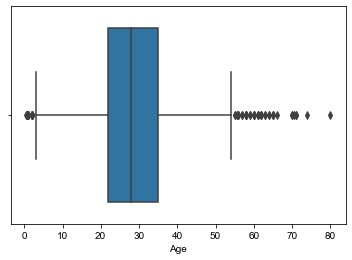

In [39]:
# coluna 'Age' no DataFrame 'treino'
verificando_outliers('Age', treino)


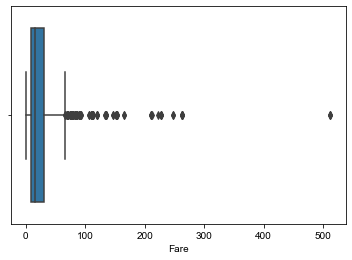

In [40]:
# coluna 'Fare' no DataFrame 'treino'
verificando_outliers('Fare', treino)

In [41]:
# Contagem de sobreviventes (1) e não sobreviventes (0)
survival_counts = treino['Survived'].value_counts()

survival_df = pd.DataFrame({
    'Survived': survival_counts.index,
    'Count': survival_counts.values,
    'Survived %': (survival_counts.values / len(treino)) * 100
})

survival_df['Survived %'] = survival_df['Survived %'].round(2)
survival_df.to_csv('../out/analises/informacoes_gerais/treino/analise_sobrevivente.csv', index=False)


survival_df

,Survived,Count,Survived %
0,0,549,61.62
1,1,342,38.38


In [42]:
# Proporção de homens e mulheres a bordo
gender_counts = treino['Sex'].value_counts()
gender_df = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values,
    'Gender %': (gender_counts.values / len(treino)) * 100
})

gender_df['Gender %'] = gender_df['Gender %'].round(2)
gender_df.to_csv('../out/analises/informacoes_gerais/treino/analise_genero.csv', index=False)
gender_df

,Gender,Count,Gender %
0,male,577,64.76
1,female,314,35.24


In [43]:
# Contagem de sobreviventes e não sobreviventes por gênero
gender_survival_counts = treino.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Calculando a porcentagem de sobreviventes em relação ao total do dataSet Classificado por Gênero
gender_total_passengers = len(treino)
gender_survival_percentage = (gender_survival_counts.T / gender_total_passengers * 100).T

gender_survival_df = pd.DataFrame({
    'Gender': gender_survival_counts.index,
    'Survived 0': gender_survival_counts[0].values,
    'Survived 1': gender_survival_counts[1].values,
    'Survived % 0': gender_survival_percentage[0].values,
    'Survived % 1': gender_survival_percentage[1].values
})

gender_survival_df[['Survived % 0', 'Survived % 1']] = gender_survival_df[['Survived % 0', 'Survived % 1']].round(2)
gender_survival_df.to_csv('../out/analises/informacoes_gerais/treino/analise_genero_sobrevivente.csv', index=False)

gender_survival_df

,Gender,Survived 0,Survived 1,Survived % 0,Survived % 1
0,female,81,233,9.09,26.15
1,male,468,109,52.53,12.23


In [44]:
# Relação entre a classe dos passageiros e a sobrevivência
class_survival = treino.groupby('Pclass')['Survived'].sum()


total_passengers = len(treino)
class_survival_percentage = (class_survival/total_passengers) * 100

class_survival_df = pd.DataFrame({
    'Pclass': class_survival.index,
    'Survival': class_survival.values,
    'Survival %': class_survival_percentage.values
})


class_survival_df['Survival %'] = class_survival_df['Survival %'].round(2)
class_survival_df.to_csv('../out/analises/informacoes_gerais/treino/analise_classe_sobrevivente.csv', index=False)
class_survival_df

,Pclass,Survival,Survival %
0,1,136,15.26
1,2,87,9.76
2,3,119,13.36


In [45]:
# Relação entre a classe dos passageiros, gênero e sobrevivência
class_gender_survival = treino.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Total de passageiros por classe e gênero
total_passengers_class_gender = treino.groupby(['Pclass', 'Sex'])['Survived'].count()

# Calculando a porcentagem de sobreviventes em relação ao total por classe e gênero
class_gender_survival_percentage = (class_gender_survival / len(treino)) * 100

# Criando um DataFrame com os resultados
class_gender_survival_df = pd.DataFrame({
    'Pclass': class_gender_survival.index.get_level_values('Pclass'),
    'Gender': class_gender_survival.index.get_level_values('Sex'),
    'Survival': class_gender_survival.values,
    'Total Passengers': total_passengers_class_gender.values,
    'Survival %': class_gender_survival_percentage.values
})

class_gender_survival_df['Survival %'] = class_gender_survival_df['Survival %'].round(2)
class_gender_survival_df = class_gender_survival_df.sort_values(by=['Pclass', 'Gender'], ascending=True)
class_gender_survival_df.to_csv('../out/analises/informacoes_gerais/treino/analise_classe_genero_sobrevivente.csv', index=False)
# Exibindo o DataFrame
class_gender_survival_df

,Pclass,Gender,Survival,Total Passengers,Survival %
0,1,female,91,94,10.21
1,1,male,45,122,5.05
2,2,female,70,76,7.86
3,2,male,17,108,1.91
4,3,female,72,144,8.08
5,3,male,47,347,5.27


# Análise Estatística dos Dados de Treino - Titanic
## Resumo Estatístico dos dados referente a coluna **Age** e **Fare**

|      | Count | Mean | Std  | Min | 25%  | 50%  | 75%  | Max   |
|------|-------|------|------|-----|------|------|------|-------|
| Age  | 891.0 | 29.36| 13.02| 0.42| 22.0 | 28.0 | 35.0 | 80.0  |
| Fare | 891.0 | 32.20| 49.69| 0.0 | 7.91 | 14.45| 31.0 | 512.33|


### Dados Estatístico Detalhado das Colunas **Age** e **Fare**

| Estatísticas (Age)        | Valores | Estatísticas (Fare)           | Valores   |
|---------------------------|---------|-------------------------------|-----------|
| Média                     | 29.36   | Média                         | 32.20     |
| Mediana                   | 28.00   | Mediana                       | 14.45     |
| Moda                      | 28.00   | Moda                          | 8.05      |
| Mínimo                    | 0.42    | Mínimo                        | 0.00      |
| Máximo                    | 80.00   | Máximo                        | 512.33    |
| Desvio Padrão             | 13.02   | Desvio Padrão                 | 49.69     |
| Amplitude                 | 79.58   | Amplitude                     | 512.33    |
| Q1                        | 22.00   | Q1                            | 7.91      |
| Q2                        | 28.00   | Q2                            | 14.45     |
| Q3                        | 35.00   | Q3                            | 31.00     |
| IQR                       | 13.00   | IQR                           | 23.09     |
| Limite Inferior Outliers  | 2.50    | Limite Inferior Outliers      | -26.72    |
| Limite Superior Outliers  | 54.50   | Limite Superior Outliers      | 65.63     |


### Análise dos sobreviventes (1) e não sobreviventes (0)

| Survived | Count | Survived % |
|----------|-------|------------|
| 0        | 549   | 61.62      |
| 1        | 342   | 38.38      |


### Proporção de homens e mulheres a bordo

| Gender | Count | Gender % |
|--------|-------|----------|
| male   | 577   | 64.76    |
| female | 314   | 35.24    |

### Análise de sobreviventes e não sobreviventes por gênero

| Gender | Survived 0 | Survived 1 | Survived % 0 | Survived % 1 |
|--------|------------|------------|--------------|--------------|
| female | 81         | 233        | 9.09         | 26.15        |
| male   | 468        | 109        | 52.53        | 12.23        |


###  Relação entre a classe dos passageiros e a sobrevivência

| Pclass | Survival      | Survival % |
|--------|---------------|------------|
| 1      | 136           | 15.26      |
| 2      | 87            | 9.76       |
| 3      | 119           | 13.36      |


###  Relação entre a classe dos passageiros e a sobrevivência por Gênero

| Pclass | Gender | Survival | Total Passengers | Survival % |
|--------|--------|----------|-------------------|------------|
| 1      | female | 91       | 94                | 10.21      |
| 1      | male   | 45       | 122               | 5.05       |
| 2      | female | 70       | 76                | 7.86       |
| 2      | male   | 17       | 108               | 1.91       |
| 3      | female | 72       | 144               | 8.08       |
| 3      | male   | 47       | 347               | 5.27       |


# ***Visualizado as Estatística dos Dados de Teste***

In [46]:
# Resumo dos Principais Dados Estatístico
age_stats = round(teste['Age'].describe(), 2)
fare_stats = round(teste['Fare'].describe(), 2)
age_stats_df = pd.DataFrame(age_stats).transpose()
fare_stats_df = pd.DataFrame(fare_stats).transpose()

stats_df = pd.concat([age_stats_df, fare_stats_df])
stats_df.to_csv('../out/analises/informacoes_gerais/teste/resumo_estatistico_dados_teste.csv')
stats_df

,count,mean,std,min,25%,50%,75%,max
Age,418.0,29.60,12.70,0.17,23.0,27.00,35.75,76.00
Fare,418.0,35.58,55.85,0.00,7.9,14.45,31.47,512.33


In [47]:
dados_estatistico_idade = dados_estatisticos(teste['Age'])
dados_estatistico_idade.to_csv('../out/analises/informacoes_gerais/teste/dados_estatistico_idade_teste.csv')

dados_estatistico_idade 

,Estatísticas,Valores
0,Média,29.60
1,Mediana,27.00
2,Moda,27.00
3,Minimo,0.17
4,Maximo,76.00
5,Desvio_Padrao,12.70
6,Amplitude,75.83
7,Q1,23.00
8,Q2,27.00
9,Q3,35.75


In [48]:
dados_estatistico_fare = dados_estatisticos(teste['Fare'])
dados_estatistico_idade.to_csv('../out/analises/informacoes_gerais/teste/dados_estatistico_fare_teste.csv')
dados_estatistico_fare

,Estatísticas,Valores
0,Média,35.58
1,Mediana,14.45
2,Moda,7.75
3,Minimo,0.00
4,Maximo,512.33
5,Desvio_Padrao,55.85
6,Amplitude,512.33
7,Q1,7.90
8,Q2,14.45
9,Q3,31.47


In [49]:
# Concatenar os DataFrames ao longo das colunas
dados = pd.concat([dados_estatistico_idade, dados_estatistico_fare], axis=1, keys=['Age', 'Fare'])
dados.to_csv('../out/analises/informacoes_gerais/teste/dados_estatistico_unificados_teste.csv')
dados

Age                              Fare        
                Estatísticas Valores              Estatísticas Valores
0                      Média   29.60                     Média   35.58
1                    Mediana   27.00                   Mediana   14.45
2                       Moda   27.00                      Moda    7.75
3                     Minimo    0.17                    Minimo    0.00
4                     Maximo   76.00                    Maximo  512.33
5              Desvio_Padrao   12.70             Desvio_Padrao   55.85
6                  Amplitude   75.83                 Amplitude  512.33
7                         Q1   23.00                        Q1    7.90
8                         Q2   27.00                        Q2   14.45
9                         Q3   35.75                        Q3   31.47
10                       IQR   12.75                       IQR   23.58
11  limite_inferior_outliers    3.88  limite_inferior_outliers  -27.47
12  limite_superior_outliers   54.88  limite_superior_outliers   66.84

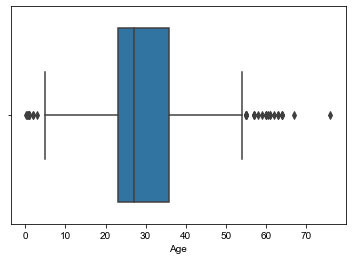

In [50]:
# coluna 'Age' no DataFrame 'teste'
verificando_outliers('Age', teste)

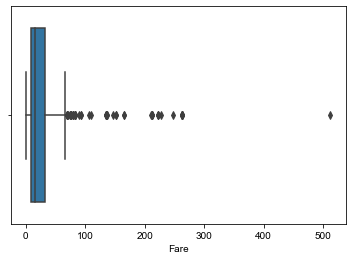

In [51]:
# coluna 'Fare' no DataFrame 'teste'
verificando_outliers('Fare', teste)

In [52]:
# Proporção de homens e mulheres a bordo
gender_counts = teste['Sex'].value_counts()
gender_df = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values,
    'Gender %': (gender_counts.values / len(teste)) * 100
})

gender_df['Gender %'] = gender_df['Gender %'].round(2)
gender_df.to_csv('../out/analises/informacoes_gerais/teste/analise_genero.csv', index=False)
gender_df

,Gender,Count,Gender %
0,male,266,63.64
1,female,152,36.36


In [53]:
# Contagem de passageiros por classe
class_counts = teste['Pclass'].value_counts()

# Total de passageiros no DataFrame de teste
total_passengers_test = len(teste)

# Calculando a porcentagem de passageiros por classe em relação ao total
class_percentage = (class_counts / total_passengers_test) * 100

class_df = pd.DataFrame({
    'Pclass': class_counts.index,
    'Total Passengers': class_counts.values,
    'Class %': class_percentage.values
})

class_df['Class %'] = class_df['Class %'].round(2)
class_df = class_df.sort_values(by=['Pclass', 'Total Passengers'], ascending=True)
class_df.to_csv('../out/analises/informacoes_gerais/teste/analise_classe.csv', index=False)

class_df

,Pclass,Total Passengers,Class %
1,1,107,25.60
2,2,93,22.25
0,3,218,52.15


In [54]:
# Contagem de passageiros por classe e sexo
class_gender_counts = teste.groupby(['Pclass', 'Sex']).size()

# Total de passageiros no DataFrame de teste
total_passengers_test = len(teste)

# Calculando a porcentagem de sexo em relação ao total por classe
class_gender_percentage = (class_gender_counts / total_passengers_test) * 100

class_gender_df = pd.DataFrame({
    'Pclass': class_gender_counts.index.get_level_values('Pclass'),
    'Gender': class_gender_counts.index.get_level_values('Sex'),
    'Total Passengers': class_gender_counts.values,
    'Gender %': class_gender_percentage.values
})

class_gender_df['Gender %'] = class_gender_df['Gender %'].round(2)
class_gender_df.to_csv('../out/analises/informacoes_gerais/teste/analise_classe_genero.csv', index=False)

class_gender_df

,Pclass,Gender,Total Passengers,Gender %
0,1,female,50,11.96
1,1,male,57,13.64
2,2,female,30,7.18
3,2,male,63,15.07
4,3,female,72,17.22
5,3,male,146,34.93


# Análise Estatística dos Dados de Teste - Titanic

### Resumo Estatístico dos dados referente a coluna **Age** e **Fare**

|      | Count | Mean | Std  | Min | 25%  | 50%  | 75%   | Max   |
|------|-------|------|------|-----|------|------|-------|-------|
| Age  | 418.0 | 29.60| 12.70| 0.17| 23.0 | 27.0 | 35.75 | 76.00 |
| Fare | 418.0 | 35.58| 55.85| 0.00| 7.90 | 14.45| 31.47 | 512.33|

### Dados Estatístico Detalhado das Colunas **Age** e **Fare**

| Estatísticas (Age)    | Valores | Estatísticas (Fare)   | Valores   |
|-----------------------|---------|-----------------------|-----------|
| Média                 | 29.60   | Média                 | 35.58     |
| Mediana               | 27.00   | Mediana               | 14.45     |
| Moda                  | 27.00   | Moda                  | 7.75      |
| Mínimo                | 0.17    | Mínimo                | 0.00      |
| Máximo                | 76.00   | Máximo                | 512.33    |
| Desvio Padrão         | 12.70   | Desvio Padrão         | 55.85     |
| Amplitude             | 75.83   | Amplitude             | 512.33    |
| Q1                    | 23.00   | Q1                    | 7.90      |
| Q2 (Mediana)          | 27.00   | Q2 (Mediana)          | 14.45     |
| Q3                    | 35.75   | Q3                    | 31.47     |
| IQR                   | 12.75   | IQR                   | 23.58     |
| Limite Inferior Outliers | 3.88 | Limite Inferior Outliers | -27.47 |
| Limite Superior Outliers | 54.88| Limite Superior Outliers | 66.84  |

## Proporção de homens e mulheres a bordo

| Gender | Count | Gender % |
|--------|-------|----------|
| male   | 266   | 63.64    |
| female | 152   | 36.36    |

## Análise de passageiros por classe

| Pclass | Total Passengers | Class % |
|--------|-------------------|---------|
| 1      | 107               | 25.60   |
| 2      | 93                | 22.25   |
| 3      | 218               | 52.15   |

## Análise de passageiros por classe e sexo

| Pclass | Gender | Total Passengers | Gender % |
|--------|--------|-------------------|----------|
| 1      | female | 50                | 11.96    |
| 1      | male   | 57                | 13.64    |
| 2      | female | 30                | 7.18     |
| 2      | male   | 63                | 15.07    |
| 3      | female | 72                | 17.22    |
| 3      | male   | 146               | 34.93    |

In [55]:
# Criando um dataSet com os dados tratados
caminho = '../data/modificados/'
name_arquivo_treino = 'treino_tratados_dados_nulos.csv'
name_arquivo_teste = 'teste_tratados_dados_nulos.csv'


treino.to_csv(caminho+name_arquivo_treino)
teste.to_csv(caminho+name_arquivo_teste)

In [56]:
# Verificando as colunas de texto na base de treino
col_treino_nr = treino.columns[treino.dtypes != 'object']
col_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [57]:
# Selecionando apenas os valores numéricos da base de treino
treino_nr = treino.loc[:,col_treino_nr]

In [58]:
col_teste_nr = teste.columns[teste.dtypes != 'object']
col_teste_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [59]:
# e os valores numéricos da base de teste
teste_nr = teste.loc[:,col_teste_nr]

# Primeiro Modelo - Modelo Simples

In [60]:
# Separando a base de treino em X e y
X = treino_nr.drop(['PassengerId','Survived'],axis=1)
Y = treino.Survived

In [61]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [62]:
def iniciar_treinamento():
    print('Treinamento - Início')
    mostra_hora()
    
def finalizar_treinamento():
    mostra_hora()
    print('Treinamento - Fim\n\n')

In [63]:
# Método responsável pela Acurácia
def acuracia(y_valor, predicao):
    # Avaliando a acurácia
    accuracy = accuracy_score(y_valor, predicao)
    
    report = classification_report(y_valor, predicao)
    confusion = confusion_matrix(y_valor, predicao)

    # Retornar as métricas como um dicionário
    metrics = {
        'Acuracia': accuracy,
        'Relatorio_Classificacao': report,
        'Matriz_Confusao': confusion
    }
    
    print(f'Acurácia do modelo: {accuracy:.2f}')

    # Outras métricas
    print('Relatório de Classificação:\n', report)
    print('Matriz de Confusão:\n', confusion)

    # Converter dicionário para DataFrame
    df_resultados = pd.DataFrame([metrics])
    
    return df_resultados

In [64]:
def grafico_curva_precisao_recall(classificador, y_dados, x_test):
    # Certifique-se de que x_test tem duas dimensões
    if len(x_test.shape) == 1:
        x_test = x_test.reshape(-1, 1)

    y_probs = classificador.predict_proba(x_test)[:, 1]

    # O resto do código permanece o mesmo
    precision, recall, thresholds = precision_recall_curve(y_dados, y_probs)
    
    df_pr_curve = pd.DataFrame({
        'Threshold': thresholds,
        'Precision': precision[:-1],  
        'Recall': recall[:-1],  
    })

    auc_score = auc(recall, precision)
    df_pr_curve['AUC'] = auc_score

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}', color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva de Precisão-Recall - Regressão Logística')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return df_pr_curve

In [65]:
def grafico_curva_roc(classificador, y_dados, x_test):

    y_probs = classificador.predict_proba(x_test)[:, 1]
    # Calculando a curva ROC
    fpr, tpr, thresholds_roc = roc_curve(y_dados, y_probs)

    # Calculando a área sob a curva ROC (AUC-ROC)
    auc_roc_score = roc_auc_score(y_dados, y_probs)

    df_curva_roc = pd.DataFrame({
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds_ROC': thresholds_roc
    })

    # Plotando a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc_score:.2f}', color='b', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Curva ROC - Regressão Logística')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    return df_curva_roc

In [66]:
def grafico_matriz_confusao(y_valor, predicao):
    import plotly.graph_objects as go
    # Calculando a matriz de confusão
    cm = confusion_matrix(y_valor, predicao)
    
    df_confusion = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predito 0', 'Predito 1'])

    # Criando a figura interativa
    fig = go.Figure()

    # Adicionando heatmap para a matriz de confusão
    fig.add_trace(go.Heatmap(
        z=cm,
        x=['Predito 0', 'Predito 1'],
        y=['Real 0', 'Real 1'],
        colorscale='Viridis'
    ))

    # Atualizando layout para torná-lo mais informativo
    fig.update_layout(
        title='Matriz de Confusão',
        xaxis=dict(title='Predições'),
        yaxis=dict(title='Valores Reais'),
    )

    # Exibindo a figura interativa
    fig.show()
    return df_confusion 

In [67]:
def grafico_verificar_normalidade_residuos(classificador, y_valor, x_teste):
    y_pred_probs = classificador.predict_proba(x_teste)[:, 1]
    
    # Calculando as informações para a curva de levantamento
    percentile, gain = skplt.metrics.cumulative_gain_curve(y_valor, y_pred_probs)

    # Criando um DataFrame com os resultados
    df_lift_curve = pd.DataFrame({
        'Percentile': percentile,
        'Gain': gain
    })

    # Mostrando o gráfico de curva de levantamento
    skplt.metrics.plot_lift_curve(y_valor, classificador.predict_proba(x_teste))
    plt.show()
    return df_lift_curve

# Árvore de classificação

In [68]:
iniciar_treinamento()
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)
finalizar_treinamento()

# Acurácia
arvore_classificacao = acuracia(y_val, y_pred_ac)

Treinamento - Início
11:41:55
11:41:55
Treinamento - Fim


Acurácia do modelo: 0.61
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       175
           1       0.52      0.44      0.48       120

    accuracy                           0.61       295
   macro avg       0.59      0.58      0.58       295
weighted avg       0.60      0.61      0.60       295

Matriz de Confusão:
 [[127  48]
 [ 67  53]]


In [69]:
arvore_classificacao.to_csv('../out/analises/modelo1/modelo1_arvore_classificacao_acuracia.csv')

# KNeighborsClassifier

In [70]:
iniciar_treinamento()
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)
finalizar_treinamento()

#acuracia
knn_classificacao = acuracia(y_val, y_pred_knn)

Treinamento - Início
11:42:2
11:42:2
Treinamento - Fim


Acurácia do modelo: 0.65
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.78      0.72       175
           1       0.59      0.46      0.51       120

    accuracy                           0.65       295
   macro avg       0.63      0.62      0.62       295
weighted avg       0.64      0.65      0.64       295

Matriz de Confusão:
 [[136  39]
 [ 65  55]]


In [71]:
knn_classificacao.to_csv('../out/analises/modelo1/modelo1_knn_classificacao_acuracia.csv')

# Regressão Logística

In [72]:
iniciar_treinamento()
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)
finalizar_treinamento()

#acuracia
regressao_logistica = acuracia(y_val, y_pred_rl)

Treinamento - Início
11:42:6
11:42:6
Treinamento - Fim


Acurácia do modelo: 0.73
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       175
           1       0.75      0.48      0.59       120

    accuracy                           0.73       295
   macro avg       0.73      0.69      0.69       295
weighted avg       0.73      0.73      0.71       295

Matriz de Confusão:
 [[156  19]
 [ 62  58]]


In [73]:
regressao_logistica.to_csv('../out/analises/modelo1/modelo1_regressao_logistica_acuracia.csv')

> [!Note] 
>
> A regressão logística é o melhor modelo dentre os três analisados.

## Verificando a predição com os Dados de Teste

In [74]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare
6,1,54.0,0,0,51.8625
718,3,28.0,0,0,15.5000
685,2,25.0,1,2,41.5792


In [75]:
teste_nr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [76]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de PassengerId
X_teste = teste_nr.drop("PassengerId",axis=1)
X_teste.head(3)

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875


In [77]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

# Criando uma coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Exportando para um csv
teste.to_csv('../out/models/modelo1.csv',index=False)

# O modelo 1 - foi trabalhado com três Modelos de Machine Learning:
* Árvore de Classificação
* KNeighborsClassifier
* Regressão Logística

## Estratégia utilizada Tratamentos dos Dados Nulos

### Árvore de Classificação
**Acurácia do Modelo:** 0.61

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.65      | 0.73   | 0.69     | 175     |
| Class 1       | 0.52      | 0.44   | 0.48     | 120     |
| Accuracy      |           |        | 0.61     | 295     |
| Macro Avg     | 0.59      | 0.58   | 0.58     | 295     |
| Weighted Avg  | 0.60      | 0.61   | 0.60     | 295     |


**Matriz de Confusão:**<br/>
[[127  48]<br/>
 [ 67  53]]

### KNeighborsClassifier
**Acurácia do Modelo:** 0.65

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.68      | 0.78   | 0.72     | 175     |
| Class 1       | 0.59      | 0.46   | 0.51     | 120     |
| Accuracy      |           |        | 0.65     | 295     |
| Macro Avg     | 0.63      | 0.62   | 0.62     | 295     |
| Weighted Avg  | 0.64      | 0.65   | 0.64     | 295     |

**Matriz de Confusão:**<br/>
 [[136  39]<br/>
 [ 65  55]]

 ### Regressão Logística
**Acurácia do Modelo:** 0.73

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.72      | 0.89   | 0.79     | 175     |
| Class 1       | 0.75      | 0.48   | 0.59     | 120     |
| Accuracy      |           |        | 0.73     | 295     |
| Macro Avg     | 0.73      | 0.69   | 0.69     | 295     |
| Weighted Avg  | 0.73      | 0.73   | 0.71     | 295     |

**Matriz de Confusão:**<br/>
 [[156  19]<br/>
 [ 62  58]]

> [!Note] 
>
> ***A regressão logística é o melhor modelo dentre os três analisados.***

# Segundo Modelo: tratamento das informações de texto para verificar se incluindo essas informações nós conseguimos aumentar a acurácia do modelo.

In [78]:
treino = pd.read_csv(caminho+name_arquivo_treino)
treino = treino.drop(['Unnamed: 0'], axis=1)
treino.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [79]:
teste = pd.read_csv(caminho+name_arquivo_teste)
teste = teste.drop(['Unnamed: 0'], axis=1)
teste.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q


In [80]:
# Verificando as colunas de texto na base de treino
treino.columns[treino.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [81]:
# Verificando os valores na coluna Sex
treino.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [82]:
# Verificando os valores na coluna Embarked
treino.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Para tratar a coluna “Sex”, podemos criar uma coluna chamada “Male_Check” que vai receber 1 se o gênero for masculino e 0 se o gênero for feminino

In [83]:
# Usando uma lambda function para fazer esse tratamento
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)

# Verificando os valores
treino[['Sex','MaleCheck']].value_counts()

Sex     MaleCheck
male    1            577
female  0            314
dtype: int64

# Agora, para tratar a coluna Embarked usando o OneHotEncoder que irá criar uma nova coluna para cada um dos rótulos da coluna original

In [84]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int32')

# Fazendo o fit com os dados
ohe.fit(treino[['Embarked']])

# Fazendo a transformação
data_one = ohe.transform(treino[['Embarked']]).toarray()

# Obtendo os nomes das features após a transformação
feature_names = ohe.get_feature_names(['Embarked'])

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(data_one, columns=feature_names)
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [85]:
# Podemos agora adicionar essa coluna na nossa base de treino
treino = pd.concat([treino,ohe_df],axis=1)

# Verificando os valores
treino[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
dtype: int64

In [86]:
# Verificando as colunas de texto na base de teste
teste.columns[teste.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [87]:
# Verificando os valores na coluna Sex
teste.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [88]:
# e na coluna Embarked
teste.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [89]:
# Usando uma lambda function para fazer esse tratamento
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

# Verificando os valores
teste[['Sex','MaleCheck']].value_counts()

Sex     MaleCheck
male    1            266
female  0            152
dtype: int64

In [90]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore', dtype='int32')

# Fazendo o fit com os dados
ohe.fit(teste[['Embarked']])

# Fazendo a transformação
data_one = ohe.transform(teste[['Embarked']]).toarray()

# Obtendo os nomes das features após a transformação
feature_names = ohe.get_feature_names(['Embarked'])

# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(data_one, columns=feature_names)
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0


In [91]:
# Podemos agora adicionar essa coluna na nossa base de treino
teste = pd.concat([teste,ohe_df],axis=1)

# Verificando os valores
teste[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             270
C         1           0           0             102
Q         0           1           0              46
dtype: int64

### Visualizando os DataFrames

In [92]:
treino.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [93]:
teste.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,0,1


In [94]:
# Podemos então apagar essas duas colunas que já tratamos
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)

In [95]:
name_arquivo_treino= 'treino_tatados_dados_sex_embarques.csv'
name_arquivo_teste = 'testes_tatados_dados_sex_embarques.csv'

treino.to_csv(caminho+name_arquivo_treino)
teste.to_csv(caminho+name_arquivo_teste)

In [96]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Árvore de classificação

In [97]:
iniciar_treinamento()
# Criando o classificador
clf_ac = DecisionTreeClassifier(random_state=42)
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)
finalizar_treinamento()

# Acurácia
arvore_classificacao = acuracia(y_val, y_pred_ac)

Treinamento - Início
11:44:1
11:44:1
Treinamento - Fim


Acurácia do modelo: 0.73
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       175
           1       0.66      0.69      0.68       120

    accuracy                           0.73       295
   macro avg       0.72      0.73      0.72       295
weighted avg       0.73      0.73      0.73       295

Matriz de Confusão:
 [[133  42]
 [ 37  83]]


In [98]:
arvore_classificacao.to_csv('../out/analises/modelo2/modelo2_arvore_classificacao_acuracia.csv')

# KNeighborsClassifier

In [99]:
iniciar_treinamento()
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)
finalizar_treinamento()

#acuracia
knn_classificacao = acuracia(y_val, y_pred_knn)

Treinamento - Início
11:44:5
11:44:5
Treinamento - Fim


Acurácia do modelo: 0.73
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       175
           1       0.72      0.53      0.61       120

    accuracy                           0.73       295
   macro avg       0.72      0.70      0.70       295
weighted avg       0.72      0.73      0.72       295

Matriz de Confusão:
 [[150  25]
 [ 56  64]]


In [100]:
knn_classificacao.to_csv('../out/analises/modelo2/modelo2_knn_classificacao_acuracia.csv')

# Regressão Logística

In [101]:
iniciar_treinamento()
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)
finalizar_treinamento()

#acuracia
regressao_logistica = acuracia(y_val, y_pred_rl)

Treinamento - Início
11:44:10
11:44:10
Treinamento - Fim


Acurácia do modelo: 0.81
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

Matriz de Confusão:
 [[153  22]
 [ 33  87]]


In [102]:
regressao_logistica.to_csv('../out/analises/modelo2/modelo2_regressao_logistica_acuracia.csv')

> Fazendo a previsão para os dados de teste
>
> Vamos usar o modelo com melhor precisão para fazer o Predict na base de teste

# Verificando a predição com os Dados de Teste

In [103]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,1,0,0,1
718,3,28.0,0,0,15.5000,1,0,1,0
685,2,25.0,1,2,41.5792,1,1,0,0


In [104]:
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


In [105]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop(['PassengerId'],axis=1)

In [106]:
X_teste.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0


In [107]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

# Criando uma coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Exportando para um csv
teste.to_csv('../out/models/modelo2.csv',index=False)

# O modelo 2 - foi trabalhado com três Modelos de Machine Learning:
* Árvore de Classificação
* KNeighborsClassifier
* Regressão Logística

## Tratamento das informações de texto:
### Utilizando as Técnicas:
* A coluna “Sex”, podemos criar uma coluna chamada “Male_Check” que vai receber 1 se o gênero for masculino e 0 se o gênero for feminino
* A coluna Embarked usando o OneHotEncoder

### Árvore de Classificação
**Acurácia do Modelo:** 0.73

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.78      | 0.76   | 0.77     | 175     |
| Class 1       | 0.66      | 0.69   | 0.68     | 120     |
| Accuracy      |           |        | 0.73     | 295     |
| Macro Avg     | 0.72      | 0.73   | 0.72     | 295     |
| Weighted Avg  | 0.73      | 0.73   | 0.73     | 295     |

**Matriz de Confusão:**<br/>
 [[133  42]<br/>
 [ 37  83]]


 ### KNeighborsClassifier
**Acurácia do Modelo:** 0.73

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.73      | 0.86   | 0.79     | 175     |
| Class 1       | 0.72      | 0.53   | 0.61     | 120     |
| Accuracy      |           |        | 0.73     | 295     |
| Macro Avg     | 0.72      | 0.70   | 0.70     | 295     |
| Weighted Avg  | 0.72      | 0.73   | 0.72     | 295     |


**Matriz de Confusão:**<br/>
 [[150  25]<br/>
 [ 56  64]]


  ### Regressão Logística
**Acurácia do Modelo:** 0.81

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.82      | 0.87   | 0.85     | 175     |
| Class 1       | 0.80      | 0.72   | 0.76     | 120     |
| Accuracy      |           |        | 0.81     | 295     |
| Macro Avg     | 0.81      | 0.80   | 0.80     | 295     |
| Weighted Avg  | 0.81      | 0.81   | 0.81     | 295     |

**Matriz de Confusão:**<br/>
 [[153  22]
 [ 33  87]]
 

 > [!Note] 
>
> ***A regressão logística é o melhor modelo dentre os três analisados.***

# Terceiro Modelo: Engenharia de Variáveis/Recursos

In [108]:
treino = pd.read_csv(caminho+name_arquivo_treino)
treino = treino.drop(['Unnamed: 0'], axis=1)
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1


In [109]:
teste = pd.read_csv(caminho+name_arquivo_teste)
teste = teste.drop(['Unnamed: 0'], axis=1)
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


### Vamos fazer alguns ajustes nos dados para melhorar o resultado do nosso modelo
- Podemos começar analisando a escala dos dados
- Depois podemos entender as colunas SibSp e Parch
- Selecionando as melhores variáveis do modelo
    - Entendendo a relação entre **Pclass e Fare**
    - Entendendo sobre as **colunas de embarque**
    - Entendendo agora as **colunas de família**

#### Analisando a escala dos dados
- As colunas **"Age" e "Fare"** estão em uma **escala muito diferente das outras**, podemos começar fazendo um ajuste nessas escalas
    - Vamos usar os **[ajustes de escala do próprio Scikit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)**
    - Como essas colunas possuem outliers, podemos começar tentando utilizar o **[RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)**

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
MaleCheck       int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object


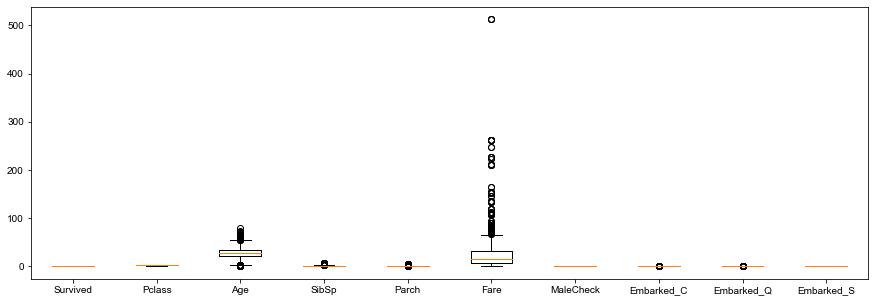

In [110]:
# Verificar os tipos de dados
print(treino.iloc[:, 1:11].dtypes)

# Converter todas as colunas para numérico (assumindo que 'treino' é um DataFrame)
treino.iloc[:, 1:11] = treino.iloc[:, 1:11].apply(pd.to_numeric, errors='coerce')

# Boxplot
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(treino.iloc[:, 1:11])

# Set x-axis ticks and labels
ax.set_xticks(range(1, treino.iloc[:, 1:11].shape[1] + 1))
ax.set_xticklabels(treino.iloc[:, 1:11].columns)

plt.show()

In [111]:
# Criando o scaler
transformer = RobustScaler().fit(treino[['Age','Fare']])

# Fazendo o transformação dos dados
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

In [112]:
# Fazendo o mesmo para a base de teste
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

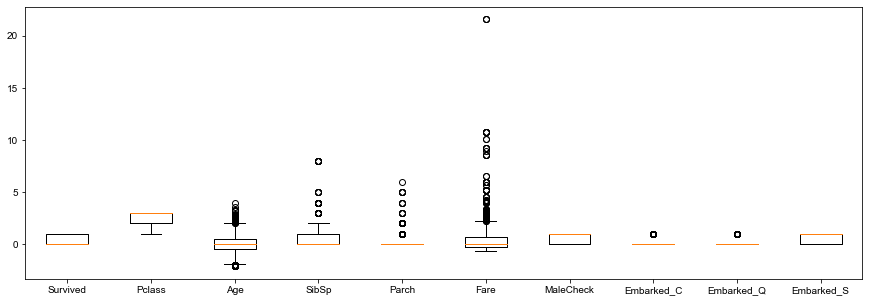

In [113]:
# Visualizando novamente os dados
fig, ax = plt.subplots(figsize=(15, 5))

# Boxplot for the numerical columns (assuming columns 1 to 10 are numerical)
ax.boxplot(treino.iloc[:, 1:11])

# Set x-axis ticks and labels
ax.set_xticks(range(1, treino.iloc[:, 1:11].shape[1] + 1))
ax.set_xticklabels(treino.iloc[:, 1:11].columns)

plt.show()

#### Entendendo as colunas SibSp e Parch
- Agora podemos entender as colunas **SibSp** e **Parch**
    - **SibSp**: Nº de irmãos/cônjuges a bordo do Titanic
    - **Parch**: Nº de pais/filhos a bordo do Titanic
- Podemos verificar quantas pessoas sobreviveram em cada um dos valores dessa coluna

In [114]:
# Verificando a sobrevivência para SibSp
SibSp_df = treino.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','tx_sobrev']
SibSp_df.to_csv('../out/analises/informacoes_gerais/treino/irmaos_conjugues_taxa_sobrevivente.csv')

SibSp_df

,SibSp,sobrev,total,tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [115]:
# Verificando a sobrevivência para Parch
Parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
Parch_df.columns = ['Parch','sobrev','total','tx_sobrev']
Parch_df.to_csv('../out/analises/informacoes_gerais/treino/pais_filhos_taxa_sobrevivente.csv')

Parch_df

,Parch,sobrev,total,tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


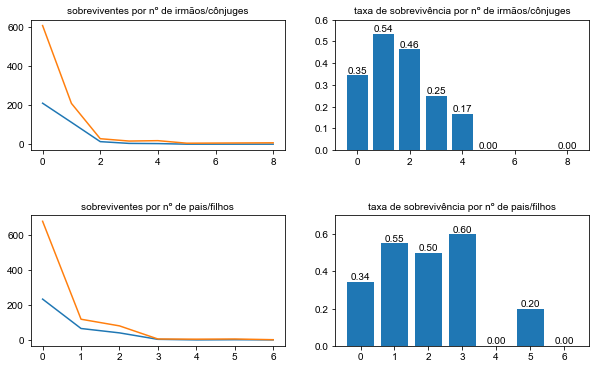

In [116]:
# Visualizando essas informações graficamente
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobrev)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)
ax[0,1].bar_label(labels1,fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobrev)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.tx_sobrev)
ax[1,1].bar_label(labels2,fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

* Passageiros viajando sozinho tiveram um menor percentual de sobrevivência
  * Podemos criar uma nova coluna identificando se o passageiro está viajando sozinho

In [117]:
# Criando uma coluna 'Sozinho' com valores 0 e 1
treino['Sozinho'] = (treino['SibSp'] + treino['Parch']) == 0

# Substituindo os valores True por 1 e False por 0
treino['Sozinho'] = treino['Sozinho'].astype(int)

# Verificando a quantidade total de passageiros viajando sozinhos
sozinho_counts = treino['Sozinho'].value_counts()

# Criando um DataFrame com os resultados
sozinho_df = pd.DataFrame({
    'Sozinho': sozinho_counts.index,
    'Count': sozinho_counts.values,
    'Sozinho %': (sozinho_counts / len(treino)) * 100
})

# Arredondando as porcentagens para duas casas decimais
sozinho_df['Sozinho %'] = sozinho_df['Sozinho %'].round(2)

# Salvando os resultados em um arquivo CSV
sozinho_df.to_csv('../out/analises/informacoes_gerais/treino/passageiros_viajando_sozinho.csv', index=False)

sozinho_df

,Sozinho,Count,Sozinho %
1,1,537,60.27
0,0,354,39.73


In [118]:
# *** Fazendo o mesmo para a base de teste ****

# Criando uma coluna 'Sozinho' com valores 0 e 1
teste['Sozinho'] = (teste['SibSp'] + teste['Parch']) == 0

# Substituindo os valores True por 1 e False por 0
teste['Sozinho'] = teste['Sozinho'].astype(int)

# Verificando a quantidade total de passageiros viajando sozinhos
sozinho_counts = teste['Sozinho'].value_counts()

sozinho_df = pd.DataFrame({
    'Sozinho': sozinho_counts.index,
    'Count': sozinho_counts.values,
    'Sozinho %': (sozinho_counts / len(teste)) * 100
})

# Arredondando as porcentagens para duas casas decimais
sozinho_df['Sozinho %'] = sozinho_df['Sozinho %'].round(2)
sozinho_df.to_csv('../out/analises/informacoes_gerais/teste/passageiros_viajando_sozinho.csv', index=False)

sozinho_df

,Sozinho,Count,Sozinho %
1,1,253,60.53
0,0,165,39.47


* Podemos também criar uma nova coluna sendo o total de familiares a bordo

In [119]:
# Criando para a base de treino
treino['Familiares'] = treino.SibSp + treino.Parch

In [120]:
# Criando para a base de teste
teste['Familiares'] = treino.SibSp + treino.Parch

In [121]:
# Verificando a quantidade total de passageiros com familiares
familiares_counts = treino['Familiares'].value_counts()

# Criando um DataFrame com os resultados
familiares_df = pd.DataFrame({
    'Familiares': familiares_counts.index,
    'Count': familiares_counts.values,
    'Familiares %': (familiares_counts / len(treino)) * 100
})

# Arredondando as porcentagens para duas casas decimais
familiares_df['Familiares %'] = familiares_df['Familiares %'].round(2)
familiares_df.to_csv('../out/analises/informacoes_gerais/treino/embarque_familiares.csv')

familiares_df

,Familiares,Count,Familiares %
0,0,537,60.27
1,1,161,18.07
2,2,102,11.45
3,3,29,3.25
5,5,22,2.47
4,4,15,1.68
6,6,12,1.35
10,10,7,0.79
7,7,6,0.67


In [122]:
# Verificando a quantidade total de passageiros com familiares
familiares_counts = teste['Familiares'].value_counts()

# Criando um DataFrame com os resultados
familiares_df = pd.DataFrame({
    'Familiares': familiares_counts.index,
    'Count': familiares_counts.values,
    'Familiares %': (familiares_counts / len(teste)) * 100
})

# Arredondando as porcentagens para duas casas decimais
familiares_df['Familiares %'] = familiares_df['Familiares %'].round(2)
familiares_df.to_csv('../out/analises/informacoes_gerais/teste/embarque_familiares.csv')

familiares_df

,Familiares,Count,Familiares %
0,0,241,57.66
1,1,85,20.33
2,2,49,11.72
5,5,12,2.87
4,4,9,2.15
3,3,8,1.91
6,6,7,1.67
10,10,4,0.96
7,7,3,0.72


In [123]:
# Verificando a sobrevivência para Familiares
Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()
Familiares_df.columns = ['Familiares','sobrev','total','tx_sobrev']
Familiares_df.to_csv('../out/analises/informacoes_gerais/teste/passageiros_viajando_familiares.csv', index=False)
Familiares_df

,Familiares,sobrev,total,tx_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


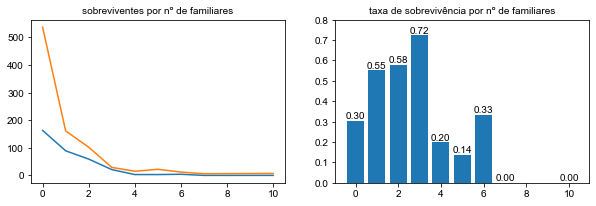

In [124]:
# Visualizando a informação de familiares
fig, ax = plt.subplots(ncols=2,figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.sobrev)
ax[0].plot(Familiares_df.Familiares, Familiares_df.total)
ax[0].set_title('sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.tx_sobrev)
ax[1].bar_label(labels1,fmt="%.02f")
ax[1].set(ylim=(0,0.8))
ax[1].set_title('taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()

* Podemos já utilizar essa base no modelo para verificar o resultado

### Selecionando os melhores recursos
* Primeiramente precisamos analisar qual a correlação entre as variáveis e verificar se não existem variáveis que estão basicamente "dizendo a mesma coisa"

In [125]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.461538,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.769231,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.153846,0,0,-0.282777,0,0,0,1,1,0


In [126]:
# Analisando a correlação entre as variáveis
treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,0.030248,-0.031415,-0.006729,0.171647,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
MaleCheck,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,0.303646,-0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


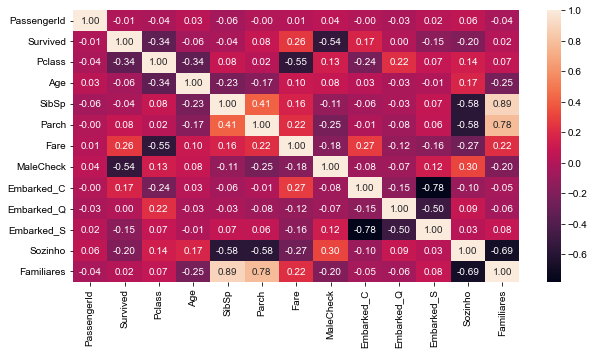

In [127]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(treino.corr(), annot=True, fmt=".2f")
plt.show()

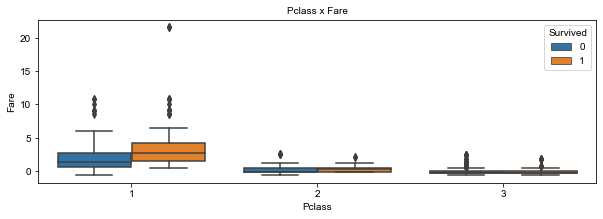

In [128]:
# Visualizando a relação entre essas variáveis
fig, ax = plt.subplots(figsize=(10,3))

sns.boxplot(data=treino,x='Pclass',y='Fare',hue='Survived')
ax.set_title('Pclass x Fare', fontsize=10)

plt.show()

In [129]:
# Verificando a taxa de sobrevivência em cada uma das classes
treino.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [130]:
# Entendendo a relação entre Pclass x Fare
treino.groupby(['Pclass','Survived'])['Fare'].agg(['min','mean','max'])

min      mean        max
Pclass Survived                               
1      0        -0.626005  2.175430  10.764405
       1         0.496977  3.514735  21.562738
2      0        -0.626005  0.214734   2.557247
       1        -0.171255  0.329217   2.189115
3      0        -0.626005 -0.033991   2.386174
       1        -0.626005 -0.032885   1.820802

Nesse momento pode surgir a pergunta do motivo de termos pessoas pagando o mesmo preço em classes diferentes
Procurando no Kaggle, essa resposta ajuda a explicar um pouco:
"Se você conseguiu economizar e guardar todo o seu dinheiro para uma viagem para mudar sua vida e ir para a América, você é uma terceira classe, um imigrante que precisa trazer sua própria comida a bordo e ter em mente como suas provisões se sustentariam. A segunda classe era formada por trabalhadores de colarinho branco que podiam se dar ao luxo de viajar com um pouco de lazer, sem se preocupar com algo tão comum como comida. Primeira classe significa que você nasceu com dinheiro e não precisa sujar as mãos com o trabalho. Eles não eram separados apenas pelo custo, eles também eram separados por onde poderiam ir e o que recebiam."

Também tem um link do Reddit que detalha bem essa questão de classe x preço
https://www.reddit.com/r/AskHistorians/comments/11dlsn6/why_was_the_cost_of_tickets_on_the_titanic_so/?onetap_auto=true
Podemos pensar em direcionar uma análise relacionando ao preço da cabine, porém essa variável possui 77.1% dos valores vazios

Entendendo sobre as colunas de embarque
Inicialmente pensamos não existir relação de ordem entre a coluna de embarque, mas pesquisando nesse artigo percebemos que existe sim essa correlação
"O Titanic deixou o porto de Southampton...Em seguida ele foi para Cherbourg-Octeville na França...em sua maioria da primeira classe.O Titanic então rumou para Queenstown na Irlanda...principalmente imigrantes da terceira classe que pretendiam tentar a vida nos Estados Unidos."

In [131]:
# Podemos importar novamente as bases para "recuperar" a coluna de embarque
treino2 = pd.read_csv('../data/default/train.csv')
teste2 = pd.read_csv('../data/default/test.csv')

treino2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [132]:
# Como temos valores vazios, podemos novamente fazer o tratamento dos dados
treino2['Embarked'] = treino2['Embarked'].fillna('S')

* O que podemos fazer agora é colocar o porto em ordem de embarque (S depois C e depois Q)
  * Podemos fazer isso através do OrdinalEncoder

In [133]:
# Criando o encoder
categorias = ['S','C','Q']
enc = OrdinalEncoder(categories=[categorias],dtype='int32')

In [134]:
# Fazendo o fit com os dados
enc = enc.fit(treino2[['Embarked']])
# Podemos então adicionar essa coluna na base de treino original
treino['Embarked'] = enc.transform(treino2[['Embarked']])

In [135]:
# E fazer o fit com os dados de teste
enc = enc.fit(teste2[['Embarked']])
# E adicionar na base de teste original
teste['Embarked'] = enc.transform(teste2[['Embarked']])

In [136]:
# Agora podemos eliminar as colunas desnecessárias
treino = treino.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
teste = teste.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)

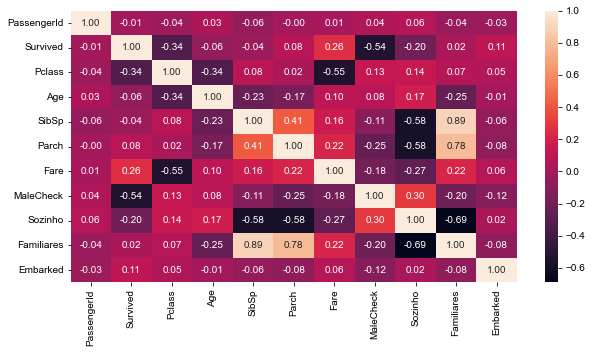

In [137]:
# Visualizando novamente a correlação
fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(treino.corr(), annot=True, fmt=".2f")

plt.show()

In [138]:
# Analisando a correlação entre as variáveis
treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,0.057462,-0.040143,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,-0.203367,0.016639,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.135207,0.065997,0.045702
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,0.171647,-0.245619,-0.009165
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.584471,0.890712,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.583398,0.783111,-0.078665
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.271832,0.217138,0.062142
MaleCheck,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,0.303646,-0.200988,-0.116569
Sozinho,0.057462,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.303646,1.000000,-0.690922,0.017807
Familiares,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,-0.200988,-0.690922,1.000000,-0.080281


* Entendendo agora as colunas de família
  * Podemos usar a regressão logística e a árvore de classificação para verificar a importância de cada uma dessas colunas

In [139]:
treino.head(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,2,1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,1,0,0
3,4,1,1,0.538462,1,0,1.673732,0,0,1,0


In [140]:
teste.head(4)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,0,0,-0.281005,1,1,1,2
1,893,3,1.568627,1,0,-0.316176,0,0,1,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2
3,895,3,0.000000,0,0,-0.245660,1,1,1,0


In [141]:
# Separando X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [142]:
# Usando a regressão logística nos dados
clf_rl = LogisticRegression(random_state=42,max_iter=1000).fit(X,y)
# Verificando a importância
clf_rl.coef_[0]

array([-1.0326742 , -0.49033135, -0.26896741,  0.01826545,  0.04455768,
       -2.53497767, -0.74102503, -0.25070196,  0.2245328 ])

In [143]:
# Agora usando a árvore de classificação
clf_ac = DecisionTreeClassifier(random_state=42).fit(X,y)

# Verificando a importância
clf_ac.feature_importances_

array([0.11058368, 0.22406348, 0.03971085, 0.02130199, 0.23942842,
       0.31088095, 0.0073744 , 0.02170496, 0.02495127])

In [144]:
name_arquivo_treino = 'treino_tratados_dados_sozinhos_familiares_embarcados.csv'
name_arquivo_teste = 'testes_tratados_dados_sozinhos_familiares_embarcados.csv'


treino.to_csv(caminho +name_arquivo_treino)
teste.to_csv(caminho+name_arquivo_teste)

In [145]:
# Podemos apenas manter as colunas mais relevantes
treino = treino.drop(['SibSp','Parch'],axis=1)
teste = teste.drop(['SibSp','Parch'],axis=1)

# Usando essa nova base no modelo

In [146]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,-0.312011,1,0,1,0
1,2,1,1,0.769231,2.461242,0,0,1,1
2,3,1,3,-0.153846,-0.282777,0,1,0,0


In [147]:
teste.head(3)

,PassengerId,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,-0.281005,1,1,1,2
1,893,3,1.568627,-0.316176,0,0,1,0
2,894,2,2.745098,-0.202184,1,1,0,2


In [148]:
# Separando X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [149]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Árvore de Classificação

In [150]:
iniciar_treinamento()
# Criando o classificador
clf_ac = DecisionTreeClassifier(random_state=42)
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)
finalizar_treinamento()

# Acurácia
arvore_classificacao = acuracia(y_val, y_pred_ac)

Treinamento - Início
11:46:12
11:46:12
Treinamento - Fim


Acurácia do modelo: 0.76
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       175
           1       0.71      0.70      0.70       120

    accuracy                           0.76       295
   macro avg       0.75      0.75      0.75       295
weighted avg       0.76      0.76      0.76       295

Matriz de Confusão:
 [[140  35]
 [ 36  84]]


In [151]:
arvore_classificacao.to_csv('../out/analises/modelo3/modelo3_arvore_classificacao_acuracia.csv')

### KNeighborsClassifier

In [152]:
iniciar_treinamento()
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)
finalizar_treinamento()

#acuracia
knn_classificacao = acuracia(y_val, y_pred_knn)

Treinamento - Início
11:46:21
11:46:21
Treinamento - Fim


Acurácia do modelo: 0.79
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.76      0.71      0.73       120

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

Matriz de Confusão:
 [[148  27]
 [ 35  85]]


In [153]:
knn_classificacao.to_csv('../out/analises/modelo3/modelo3_knn_classificacao_acuracia.csv')

### Regressão Logística

In [154]:
iniciar_treinamento()
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)
finalizar_treinamento()

#acuracia
regressao_logistica = acuracia(y_val, y_pred_rl)

Treinamento - Início
11:46:29
11:46:29
Treinamento - Fim


Acurácia do modelo: 0.81
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       175
           1       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

Matriz de Confusão:
 [[154  21]
 [ 35  85]]


In [155]:
regressao_logistica.to_csv('../out/analises/modelo3/modelo3_regressao_logistica_acuracia.csv')

> [!Note] 
>
> A regressão logística é o melhor modelo dentre os três analisados.

## Verificando a predição com os Dados de Teste

In [156]:
# Visualizando o X_train
X_train.head(3)

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,2.000000,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.230769,1.174771,1,0,3,1


In [157]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,-0.281005,1,1,1,2
1,893,3,1.568627,-0.316176,0,0,1,0
2,894,2,2.745098,-0.202184,1,1,0,2


In [158]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)


In [159]:
X_teste.head()

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,0.588235,-0.281005,1,1,1,2
1,3,1.568627,-0.316176,0,0,1,0
2,2,2.745098,-0.202184,1,1,0,2
3,3,0.000000,-0.245660,1,1,1,0
4,3,-0.392157,-0.091902,0,0,0,0


In [160]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Exportando para um csv
teste.to_csv('../out/models/modelo3.csv',index=False)

# O modelo 3 - foi trabalhado com três Modelos de Machine Learning:
* Árvore de Classificação
* KNeighborsClassifier
* Regressão Logística

## Engenharia de Variáveis/Recursos:
### Utilizando as Técnicas:
* Ajuste das escalas referente as coluna **'Age'** e **'Fare'**
    - Utilizando o RobustScaler
* Entendendo as colunas SibSp e Parch

### SibSp

| SibSp | Sobrev | Total | Tx_Sobrev |
|-------|--------|-------|-----------|
| 0     | 210    | 608   | 34.54%    |
| 1     | 112    | 209   | 53.59%    |
| 2     | 13     | 28    | 46.43%    |
| 3     | 4      | 16    | 25.00%    |
| 4     | 3      | 18    | 16.67%    |
| 5     | 0      | 5     | 0.00%     |
| 8     | 0      | 7     | 0.00%     |


### Parch

| Parch | Sobrev | Total | Tx_Sobrev |
|-------|--------|-------|-----------|
| 0     | 233    | 678   | 34.37%    |
| 1     | 65     | 118   | 55.08%    |
| 2     | 40     | 80    | 50.00%    |
| 3     | 3      | 5     | 60.00%    |
| 4     | 0      | 4     | 0.00%     |
| 5     | 1      | 5     | 20.00%    |
| 6     | 0      | 1     | 0.00%     |

### Ciação de uma coluna **'Sozinho'** referente ao embarque

| Sozinho | Count | Sozinho % |
|---------|-------|------------|
| 1       | 537   | 60.27      |
| 0       | 354   | 39.73      |


### Ciação de uma coluna **'Familiares'** referente ao embarque

| Familiares | Count | Familiares % |
|------------|-------|---------------|
| 0          | 537   | 60.27         |
| 1          | 161   | 18.07         |
| 2          | 102   | 11.45         |
| 3          | 29    | 3.25          |
| 5          | 22    | 2.47          |
| 4          | 15    | 1.68          |
| 6          | 12    | 1.35          |
| 10         | 7     | 0.79          |
| 7          | 6     | 0.67          |


# Verificando a sobrevivência para Familiares

| Familiares | Sobrev | Total | Tx_Sobrev |
|------------|--------|-------|-----------|
| 0          | 163    | 537   | 30.35%    |
| 1          | 89     | 161   | 55.28%    |
| 2          | 59     | 102   | 57.84%    |
| 3          | 21     | 29    | 72.41%    |
| 4          | 3      | 15    | 20.00%    |
| 5          | 3      | 22    | 13.64%    |
| 6          | 4      | 12    | 33.33%    |
| 7          | 0      | 6     | 0.00%     |
| 10         | 0      | 7     | 0.00%     |

* Selecionar os melhores Recursos
* Carregando os Dados Embarques
* Criando o Encoder destes dados 
* Eliminando as Colunas ['Embarked_C','Embarked_Q','Embarked_S']

### Árvore de Classificação

**Acurácia do Modelo:** 0.76

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.80      | 0.80   | 0.80     | 175     |
| Class 1       | 0.71      | 0.70   | 0.70     | 120     |
| Accuracy      |           |        | 0.76     | 295     |
| Macro Avg     | 0.75      | 0.75   | 0.75     | 295     |
| Weighted Avg  | 0.76      | 0.76   | 0.76     | 295     |

**Matriz de Confusão:**<br/>
 [[140  35] <br/>
 [ 36  84]]

 ### KNeighborsClassifier

**Acurácia do Modelo:** 0.79

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.81      | 0.85   | 0.83     | 175     |
| Class 1       | 0.76      | 0.71   | 0.73     | 120     |
| Accuracy      |           |        | 0.79     | 295     |
| Macro Avg     | 0.78      | 0.78   | 0.78     | 295     |
| Weighted Avg  | 0.79      | 0.79   | 0.79     | 295     |


**Matriz de Confusão:**<br/>
 [[148  27]<br/>
 [ 35  85]]

### Regressão Logística

**Acurácia do Modelo:** 0.81

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.81      | 0.88   | 0.85     | 175     |
| Class 1       | 0.80      | 0.71   | 0.75     | 120     |
| Accuracy      |           |        | 0.81     | 295     |
| Macro Avg     | 0.81      | 0.79   | 0.80     | 295     |
| Weighted Avg  | 0.81      | 0.81   | 0.81     | 295     |

**Matriz de Confusão:**<br/>
 [[154  21]<br/>
 [ 35  85]]

 > [!Note] 
>
> ***A regressão logística é o melhor modelo dentre os três analisados.***

# Quarto modelo: Teste Modelos e Melhora de Parâmetro

In [161]:
treino = pd.read_csv(caminho+name_arquivo_treino)
treino = treino.drop(['Unnamed: 0'], axis=1)
teste = pd.read_csv(caminho+name_arquivo_teste)
teste = teste.drop(['Unnamed: 0'], axis=1)

In [162]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,2,1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,1,0,0


In [163]:
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.588235,0,0,-0.281005,1,1,1,2
1,893,3,1.568627,1,0,-0.316176,0,0,1,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2


In [164]:
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

Na base de treino o X será toda a base exceto as colunas PassengerID e Survived. Estamos usando o axis=1 para eliminar a coluna inteira.

In [165]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Regressão Logística

In [166]:
iniciar_treinamento()
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)
finalizar_treinamento()
#Acuácia
regressao_logistica = acuracia(y_val, y_pred_rl)

Treinamento - Início
11:47:24
11:47:24
Treinamento - Fim


Acurácia do modelo: 0.81
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       175
           1       0.79      0.72      0.75       120

    accuracy                           0.81       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

Matriz de Confusão:
 [[152  23]
 [ 34  86]]


In [167]:
regressao_logistica.to_csv('../out/analises/modelo4/modelo4_regressao_logistica_acuracia.csv')

# Random Forest

In [168]:
iniciar_treinamento()
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)
# Fazendo o fit com os dados
clf_rf = clf_rf.fit(X_train,y_train)
# Fazendo previsões no conjunto de validação
y_pred_rf = clf_rf.predict(X_val)
finalizar_treinamento()

# Acurácia
random_forest = acuracia(y_val, y_pred_rf)

Treinamento - Início
11:47:28
11:47:28
Treinamento - Fim


Acurácia do modelo: 0.78
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       175
           1       0.73      0.71      0.72       120

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295

Matriz de Confusão:
 [[144  31]
 [ 35  85]]


In [169]:
random_forest.to_csv('../out/analises/modelo4/modelo4_random_forest_acuracia.csv')

# MLPClassifier (Redes Neurais)

In [170]:
iniciar_treinamento()
# Criando o classificador
clf_mlp = MLPClassifier(random_state=42,max_iter=5000)
# Fazendo o fit com os dados
clf_mlp = clf_mlp.fit(X_train,y_train)
# Fazendo a previsão
y_pred_mlp = clf_mlp.predict(X_val)
finalizar_treinamento()

#Acurácia
mlp_classifier = acuracia(y_val, y_pred_mlp)

Treinamento - Início
11:47:33
11:47:37
Treinamento - Fim


Acurácia do modelo: 0.81
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       175
           1       0.81      0.69      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

Matriz de Confusão:
 [[156  19]
 [ 37  83]]


In [171]:
mlp_classifier.to_csv('../out/analises/modelo4/modelo4_mlp_classificacao_acuracia.csv')

> [!Note] 
>
> O MLPClasifier (RedesNeurais) é o melhor modelo dentre os três analisados.

## Verificando a predição com os Dados de Teste

In [172]:
# Visualizando o X_train
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,2.000000,0,0,1.620136,1,1,0,0
718,3,0.000000,0,0,0.045293,1,1,0,2
685,2,-0.230769,1,2,1.174771,1,0,3,1


In [ ]:
# Visualizando a base de teste
teste.head(3)

In [173]:
# Para a base de teste ser igual à base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)
# Utilizando o melhor modelo na base de teste
y_pred = clf_mlp.predict(X_teste)
# Criando uma coluna com a previsão na base de teste
teste['Survived'] = y_pred

# Exportando para um csv
teste.to_csv('../out/models/modelo4.csv',index=False)

## Modelo 4:  foi trabalhado com três Modelos de Machine Learning:
* Regressão Logística
* Random Forest
* MLPClassifier (Redes Neurais)

#### A estratégia utilizada:
* Teste Modelos e Melhora de Parâmetro

### Regressão Logística

**Acurácia do Modelo:** 0.81

**Relatório de Classificação:**


|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.82      | 0.87   | 0.84     | 175     |
| Class 1       | 0.79      | 0.72   | 0.75     | 120     |
| Accuracy      |           |        | 0.81     | 295     |
| Macro Avg     | 0.80      | 0.79   | 0.80     | 295     |
| Weighted Avg  | 0.81      | 0.81   | 0.81     | 295     |


**Matriz de Confusão:**<br/>
 [[152  23]<br/>
 [ 34  86]]


### MLPClassifier (Redes Neurais)

**Acurácia do Modelo:** 0.78

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.80      | 0.82   | 0.81     | 175     |
| Class 1       | 0.73      | 0.71   | 0.72     | 120     |
| Accuracy      |           |        | 0.78     | 295     |
| Macro Avg     | 0.77      | 0.77   | 0.77     | 295     |
| Weighted Avg  | 0.78      | 0.78   | 0.78     | 295     |


**Matriz de Confusão:**<br/>
 [[144  31]
 [ 35  85]]


### Regressão Logística

**Acurácia do Modelo:** 0.81

**Relatório de Classificação:**

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| Class 0       | 0.81      | 0.89   | 0.85     | 175     |
| Class 1       | 0.81      | 0.69   | 0.75     | 120     |
| Accuracy      |           |        | 0.81     | 295     |
| Macro Avg     | 0.81      | 0.79   | 0.80     | 295     |
| Weighted Avg  | 0.81      | 0.81   | 0.81     | 295     |


**Matriz de Confusão:**<br/>
 [[156  19]<br/>
 [ 37  83]]

# Quinto Modelo: Grid Search

In [174]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,2,1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,1,0,0


In [175]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [176]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Logística

In [177]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

In [178]:
# Definindo os parâmetros
parametros_rl = {
    'penalty': ['l1','l2'],
    'C': [0.01,0.1,1,10],
    'solver': ['lbfgs','liblinear','saga'],
    'max_iter': [100,1000,5000,10000]
}

# Random Forest

In [179]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

In [180]:
# Definindo os parâmetros
parametros_rf = {
    'n_estimators': [100,200,500,1000],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,4,6,8,None],
    'max_features': ['sqrt','log2',None]
}

# MLPClassifier (Redes Neurais)

In [181]:
# Criando o classificador
clf_mlp = MLPClassifier(random_state=42)

In [182]:
# Definindo os parâmetros
parametros_mlp = {
    'solver':  ['lbfgs','sgd','adam'],
    'alpha': [10.0**(-1),10.0**(-5),10.0**(-7),10.0**(-10)],
    'max_iter': [200,500,1000,5000]
}

Fazendo o grid_search

In [183]:
# Para a Regressão Logística
iniciar_treinamento()
kfold_rl = KFold(shuffle=True, random_state=42,n_splits=8)
grid_search_rl = GridSearchCV(estimator=clf_rl,param_grid=parametros_rl,scoring='accuracy',cv=kfold_rl)
grid_search_rl = grid_search_rl.fit(X_train,y_train)
finalizar_treinamento()

Treinamento - Início
11:49:11
11:49:20
Treinamento - Fim




In [184]:
# Para o RandomForest
iniciar_treinamento()
kfold_rf = KFold(shuffle=True, random_state=42,n_splits=8)
grid_search_rf = GridSearchCV(estimator=clf_rf,param_grid=parametros_rf,scoring='accuracy',cv=kfold_rf)
grid_search_rf = grid_search_rf.fit(X_train,y_train)
finalizar_treinamento()

Treinamento - Início
11:49:32
12:0:12
Treinamento - Fim




In [185]:
# Para o MLPClassifier
iniciar_treinamento()
kfold_mlp = KFold(shuffle=True, random_state=42,n_splits=8)
grid_search_mlp = GridSearchCV(estimator=clf_mlp,param_grid=parametros_mlp,scoring='accuracy',cv=kfold_mlp)
grid_search_mlp = grid_search_mlp.fit(X_train,y_train)
finalizar_treinamento()

Treinamento - Início
12:0:18
12:8:58
Treinamento - Fim




In [186]:
analise =f'''  
**********************************************************
            Dados do Treinamento do Modelo
**********************************************************
Regressão Logística
__________________________________________________________
Melhor Score para Regressão Logística: {grid_search_rl.best_score_}
Melhores Parâmetros para Regressão Logística:
{grid_search_rl.best_params_}
----------------------------------------------------------
RandomForest
__________________________________________________________
Melhor Score para RandomForest:        {grid_search_rf.best_score_}
Melhores Parâmetros para RandomForest:
{grid_search_rf.best_params_}
----------------------------------------------------------
MLPClassifier
__________________________________________________________
Melhor Score para MLPClassifier:       {grid_search_mlp.best_score_}
Melhores Parâmetros para MLPClassifier:
{grid_search_mlp.best_params_}
-----------------------------------------------------------
'''
print(analise)

  
**********************************************************
            Dados do Treinamento do Modelo
**********************************************************
Regressão Logística
__________________________________________________________
Melhor Score para Regressão Logística: 0.8089887640449438
Melhores Parâmetros para Regressão Logística:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
----------------------------------------------------------
RandomForest
__________________________________________________________
Melhor Score para RandomForest:        0.8314606741573034
Melhores Parâmetros para RandomForest:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 1000}
----------------------------------------------------------
MLPClassifier
__________________________________________________________
Melhor Score para MLPClassifier:       0.8174157303370786
Melhores Parâmetros para MLPClassifier:
{'alpha': 1e-05, 'max_iter': 200, 'solver': 'ad

In [187]:
# DataSet dos Scores e Parâmetos
dados = {
    "Modelo": ["Regressão Logística", "RandomForest", "MLPClassifier"],
    "Melhor Score": [
        grid_search_rl.best_score_,
        grid_search_rf.best_score_,
        grid_search_mlp.best_score_,
    ],
    "Melhores Parâmetros": [
        str(grid_search_rl.best_params_),
        str(grid_search_rf.best_params_),
        str(grid_search_mlp.best_params_),
    ],
}

df_analise = pd.DataFrame(dados)
df_analise.to_csv('../out/analises/modelo5/scores_param.csv')

### Regressão Logística

In [188]:
# regressão logística
clf_rl_best = grid_search_rl.best_estimator_
y_pred_rl = clf_rl_best.predict(X_val)

#Acuácia
regressao_logistica = acuracia(y_val, y_pred_rl)

Acurácia do modelo: 0.80
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusão:
 [[91 14]
 [21 53]]


In [189]:
regressao_logistica.to_csv('../out/analises/modelo5/modelo5_regressao_logistica_acuracia.csv')

### Random Forest

In [190]:
# RandomForest
clf_rf_best = grid_search_rf.best_estimator_
y_pred_rf = clf_rf_best.predict(X_val)

# Acurácia
random_forest = acuracia(y_val, y_pred_rf)

Acurácia do modelo: 0.80
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Matriz de Confusão:
 [[94 11]
 [24 50]]


In [191]:
random_forest.to_csv('../out/analises/modelo5/modelo5_random_forest_acuracia.csv')

### MLPClassifier (Redes Neurais)

In [192]:
# e para o MLPClassifier
clf_mlp_best = grid_search_mlp.best_estimator_
y_pred_mlp = clf_mlp_best.predict(X_val)

#Acurácia
mlp_classifier = acuracia(y_val, y_pred_mlp)

Acurácia do modelo: 0.80
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusão:
 [[92 13]
 [22 52]]


In [193]:
mlp_classifier.to_csv('../out/analises/modelo5/modelo5_mlp_classificacao_acuracia.csv')

# Verificando a predição com os Dados de Teste

In [194]:
# Visualizando o X_train
X_train.head(3)


,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
331,1,1.346154,0,0,0.608317,1,1,0,0
733,2,-0.384615,0,0,-0.062981,1,1,0,0
382,3,0.307692,0,0,-0.282777,1,1,0,0


In [195]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked,Survived
0,892,3,0.588235,0,0,-0.281005,1,1,1,2,0
1,893,3,1.568627,1,0,-0.316176,0,0,1,0,0
2,894,2,2.745098,0,0,-0.202184,1,1,0,2,0


In [196]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop(['PassengerId','Survived' ],axis=1)

In [197]:
X_teste.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,0.588235,0,0,-0.281005,1,1,1,2
1,3,1.568627,1,0,-0.316176,0,0,1,0
2,2,2.745098,0,0,-0.202184,1,1,0,2


In [198]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
331,1,1.346154,0,0,0.608317,1,1,0,0
733,2,-0.384615,0,0,-0.062981,1,1,0,0
382,3,0.307692,0,0,-0.282777,1,1,0,0


In [199]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,3,-0.461538,1,0,-0.312011,1,0,1,0
1,1,0.769231,1,0,2.461242,0,0,1,1
2,3,-0.153846,0,0,-0.282777,0,1,0,0


In [200]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl_best.predict(X_teste)

In [201]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred
# Exportando para um csv
teste.to_csv('../out/models/modelo5.csv',index=False)

# Modelo Cinco: foi trabalhado com três Modelos de Machine Learning:
* Regressão Logística
* Random Florest
* MLP Classifier (Redes Neurais)

### A Estratégia adotada foi Grid Search

>  **********************************************************
>            Dados do Treinamento do Modelo
>  **********************************************************
>  **Regressão Logística**
>  __________________________________________________________
>  Melhor Score para Regressão Logística: 0.8089887640449438
>  Melhores Parâmetros para Regressão Logística:
>  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
>  ----------------------------------------------------------
>  **RandomForest**
>  __________________________________________________________
>  Melhor Score para RandomForest:        0.8314606741573034
>  Melhores Parâmetros para RandomForest:
>  {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 1000}
>  ----------------------------------------------------------
>  **MLPClassifier**
>  __________________________________________________________
>  Melhor Score para MLPClassifier:       0.8174157303370786
>  Melhores Parâmetros para MLPClassifier:
>  {'alpha': 1e-05, 'max_iter': 200, 'solver': 'adam'}
>  -----------------------------------------------------------

### Regressão Logística
**Acurácia**: 0.80

**Relatório de Classificação:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.81    |  0.87  |   0.84   |   105   |
|   1   |   0.79    |  0.72  |   0.75   |   74    |
|-------|-----------|--------|----------|---------|
|Macro Avg|   0.80    |  0.79  |   0.80   |   179   |
|Weighted Avg|   0.80    |  0.80  |   0.80   |   179   |

**Matriz de Confusão:**<br>
[[91 14] <br/>
 [21 53]]


### Random Florest
**Acurácia**: 0.80

**Relatório de Classificação:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.80    |  0.90  |   0.84   |   105   |
|   1   |   0.82    |  0.68  |   0.74   |   74    |
|-------|-----------|--------|----------|---------|
|Macro Avg|   0.81    |  0.79  |   0.79   |   179   |
|Weighted Avg|   0.81    |  0.80  |   0.80   |   179   |
 
**Matriz de Confusão:**<br>
 [[94 11]<br>
 [24 50]]


 ### MLP Classifier (Redes Neurais)
**Acurácia**: 0.80

**Relatório de Classificação:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.81    |  0.88  |   0.84   |   105   |
|   1   |   0.80    |  0.70  |   0.75   |   74    |
|-------|-----------|--------|----------|---------|
|Macro Avg|   0.80    |  0.79  |   0.79   |   179   |
|Weighted Avg|   0.80    |  0.80  |   0.80   |   179   |

**Matriz de Confusão:**<br>
 [[92 13]<br/>
 [22 52]]

### Análise dos Dados de Predição - Resiltado dos modelos Treinados imputando os Dados de Teste

In [293]:
df_resultado_modelo1 = pd.read_csv('../out/models/modelo1.csv', sep=',')
df_resultado_modelo2 = pd.read_csv('../out/models/modelo2.csv', sep=',')
df_resultado_modelo3 = pd.read_csv('../out/models/modelo3.csv', sep=',')
df_resultado_modelo4 = pd.read_csv('../out/models/modelo4.csv', sep=',')
df_resultado_modelo5 = pd.read_csv('../out/models/modelo5.csv', sep=',')

In [287]:
def predicao_sobreviventes(dataframe):
    survival_percentage = (dataframe['Survived'].sum() / len(dataframe)) * 100
    survival_percentage
    total_survivors = dataframe['Survived'].sum()
    total_non_survivors = len(dataframe) - total_survivors

    percentage_survivors = (total_survivors / len(dataframe)) * 100
    percentage_non_survivors = (total_non_survivors / len(dataframe)) * 100

    result_df = pd.DataFrame({
        'Category': ['Survivors', 'Non-Survivors'],
        'Total': [total_survivors, total_non_survivors],
        'Percentage %': [percentage_survivors, percentage_non_survivors]
    })
    
    result_df = result_df.round(2)
    print(result_df)

    return result_df



In [288]:
df_modelo1_sobreviventes = predicao_sobreviventes(df_resultado_modelo1)
df_modelo1_sobreviventes.to_csv('../out/predicao/modelo1_sobreviventes.csv')

        Category  Total  Percentage %
0      Survivors    109         26.08
1  Non-Survivors    309         73.92


In [289]:
df_modelo2_sobreviventes = predicao_sobreviventes(df_resultado_modelo2)
df_modelo2_sobreviventes.to_csv('../out/predicao/modelo2_sobreviventes.csv')

        Category  Total  Percentage %
0      Survivors    155         37.08
1  Non-Survivors    263         62.92


In [290]:
df_modelo3_sobreviventes = predicao_sobreviventes(df_resultado_modelo3)
df_modelo3_sobreviventes.to_csv('../out/predicao/modelo3_sobreviventes.csv')

        Category  Total  Percentage %
0      Survivors    155         37.08
1  Non-Survivors    263         62.92


In [291]:
df_modelo4_sobreviventes = predicao_sobreviventes(df_resultado_modelo4)
df_modelo4_sobreviventes.to_csv('../out/predicao/modelo4_sobreviventes.csv')

        Category  Total  Percentage %
0      Survivors    162         38.76
1  Non-Survivors    256         61.24


In [292]:
df_modelo5_sobreviventes = predicao_sobreviventes(df_resultado_modelo5)
df_modelo5_sobreviventes.to_csv('../out/predicao/modelo5_sobreviventes.csv')

        Category  Total  Percentage %
0      Survivors    151         36.12
1  Non-Survivors    267         63.88
